In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fruit_segmentation(buah):
    # Membaca citra
    image = cv2.imread(buah)
    
    # Mengkonversi citra ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Menentukan rentang warna untuk setiap buah yang ditentukan
    color_ranges = {
        'apel': (np.array([0, 40, 50]), np.array([15, 255, 255])),
        'mangga hijau': (np.array([30, 50, 50]), np.array([70, 255, 255])),
        'jeruk': (np.array([10, 100, 20]), np.array([30, 255, 255]))
    }
    
    fruits = ['apel', 'mangga hijau', 'jeruk']
    masks = []
    segmented_images = []
    
    for fruit in fruits:
        # Menentukan rentang warna berdasarkan buah yang ditentukan
        lower_color, upper_color = color_ranges.get(fruit.lower())
        
        if lower_color is None or upper_color is None:
            print(f"Buah {fruit} tidak didukung.")
            continue
        
        # Menerapkan ambang pada citra HSV
        mask = cv2.inRange(hsv_image, lower_color, upper_color)
        
        # Melakukan operasi morfologi (opsional) untuk memperbaiki hasil segmentasi
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        
        # Mengaplikasikan mask ke citra asli untuk mendapatkan hasil segmentasi
        segmented_image = cv2.bitwise_and(image, image, mask=mask)
        
        masks.append(mask)
        segmented_images.append(segmented_image)
    
    # Menampilkan citra asli, citra mask, dan hasil segmentasi
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    
    for i in range(len(fruits)):
        plt.subplot(2, 4, i+5), plt.imshow(cv2.cvtColor(segmented_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Hasil Segmentasi {fruits[i]}') 
    
    plt.tight_layout()
    plt.show()

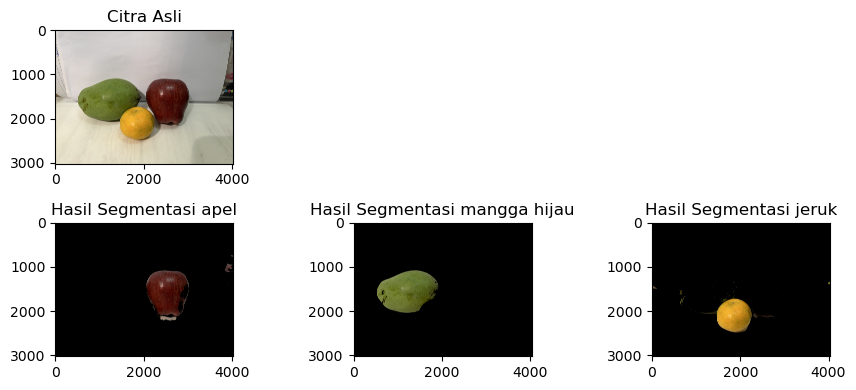

In [3]:
buah = 'Original Image.jpg'
fruit_segmentation(buah)